# EDA 
## Assignment 1
## Video Games DataSet

Download Link: https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download



In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("./vgsales.csv")

# Task 1:
Type inference
1. Detect the types of columns in a dataframe
2. Categorise them to numerical and categorical data types




In [34]:
print(df.dtypes)
print(df.columns)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [35]:
print(df.select_dtypes(include=['int64', 'float64']).columns)
print(df.select_dtypes(include=['object']).columns)

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')
Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


# Task 2
Essentials
1. Data value type  
2. Unique values
3. Indication of missing values







In [36]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [37]:
unique_values = {column: df[column].unique() for column in df.columns}

def print_unique_values(index):
    print(f"Unqiue values in '{list(unique_values.keys())[index]}': {list(unique_values.values())[index]}")

for i in range(len(unique_values)):
    print_unique_values(i)

Unqiue values in 'Rank': [    1     2     3 ... 16598 16599 16600]
Unqiue values in 'Name': ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
Unqiue values in 'Platform': ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Unqiue values in 'Year': [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
Unqiue values in 'Genre': ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Unqiue values in 'Publisher': ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Beth

In [38]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Task 3
Quantile statistics
1.   minimum value
2.   median
3.   maximum value
4.   range
5. most frequent and extreme values
6. file size, no. of rows n cols, creation dates




In [39]:
def find_max_min_values(df):

    max_values = df.max().to_dict()
    min_values = df.min().to_dict()

    return max_values, min_values

max_values, min_values = find_max_min_values(df)

print ("Max values:")
for key, value in max_values.items():
    print(key, value)

print ("\nMin values:")
for key, value in min_values.items():
    print(key, value)

Max values:
Rank 16600
Name ¡Shin Chan Flipa en colores!
Platform XOne
Year 2020.0
Genre Strategy
NA_Sales 41.49
EU_Sales 29.02
JP_Sales 10.22
Other_Sales 10.57
Global_Sales 82.74

Min values:
Rank 1
Name '98 Koshien
Platform 2600
Year 1980.0
Genre Action
NA_Sales 0.0
EU_Sales 0.0
JP_Sales 0.0
Other_Sales 0.0
Global_Sales 0.01


/tmp/ipykernel_47269/4066074440.py:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_values = df.max().to_dict()
/tmp/ipykernel_47269/4066074440.py:4: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_values = df.min().to_dict()


In [40]:
x = df['Rank'].value_counts()
x.max()

1

In [41]:
most_frequent_values= {}

for column in df.columns:
  most_frequent_value_counts = df[column].value_counts()
  max_frequency = most_frequent_value_counts.max()
  most_frequent_values[column] = most_frequent_value_counts[most_frequent_value_counts == max_frequency].index.tolist()[0]

print(most_frequent_values.keys())

dict_keys(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])


In [42]:
print(f"Rows = {df.shape[0]}, Columns = {df.shape[1]}")

Rows = 16598, Columns = 11


In [43]:
print(df.duplicated().value_counts())

False    16598
dtype: int64


#**5) Correlation**
* high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramer’s V, Phik) - choose any one metric  





**How all the correlation metrics work**
* Spearman: Rank-based correlation metric that assesses the strength and direction of a monotonic relationship between two numerical variables. It measures the degree to which the ranks of the data points increase or decrease together. Spearman correlation is robust to outliers and can capture non-linear relationships.

* Pearson: parametric correlation metric that measures the linear relationship between two numerical variables. It computes the covariance of the two variables divided by the product of their standard deviations. Pearson correlation is sensitive to outliers and assumes that the relationship between variables is linear.

* Kendall Correlation:
Rank-based correlation metric that evaluates the strength and direction of a monotonic relationship between two numerical variables. It counts the number of concordant and discordant pairs of data points. Kendall correlation is less sensitive to outliers and can capture non-linear relationships.

* Cramer's V:
Used for categorical data. It measures the association between two categorical variables in a contingency table. Cramer's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

* Phik (Phik Coefficient):
Designed for handling mixed-type data. It can measure the association between mixed-type variables, including numerical, categorical, and ordinal variables. Phik ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.


**Phix is the best to be used here since it is good with mixed data types (int,string,etc.)**

In [44]:
#trying out pearson since phix was not working with the column 'Name' in it.
correlation_matrix = df.corr(method='pearson')
correlation_threshold = 0.8
high_correlations = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix < 1)

for col in high_correlations.columns:
  for row in high_correlations.index:
    if high_correlations.loc[row, col] and col>row:
      print(f"Strong relation: '{row}' and '{col}' : {correlation_matrix.loc[row, col]:.2f}")


#only prints numeric relations

Strong relation: 'Global_Sales' and 'NA_Sales' : 0.94
Strong relation: 'EU_Sales' and 'Global_Sales' : 0.90


/tmp/ipykernel_47269/2188936734.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


# Task 6
Missing values: 
1. through counts 
2. matrix 
3. heat map 

Missing Value Counts:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


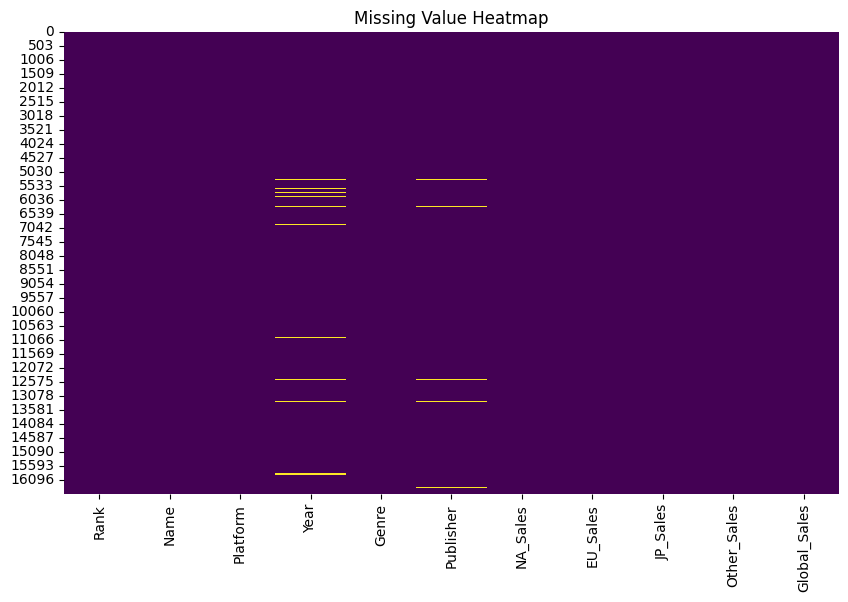

In [45]:
missing_value = df.isnull()


print("Missing Value Counts:")
print(missing_value.sum())


plt.figure(figsize=(10, 6))
sns.heatmap(missing_value, cmap='viridis', cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

# Task 7
Duplicate rows: 
1. list of most common duplicated rows 


In [46]:
duplicate_rows = df[df.duplicated()]

duplicate_counts = duplicate_rows.groupby(duplicate_rows.columns.tolist()).size().reset_index(name='count')

most_common_duplicates = duplicate_counts.sort_values(by='count', ascending=False)

print("List of Most Common Duplicated Rows:")
print(most_common_duplicates)

List of Most Common Duplicated Rows:
Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, count]
Index: []


# Task 8
File analysis: 
1. file sizes 
2. creation dates 
3. Dimensions


In [48]:
import os
import pandas as pd
import time

filepath = "./vgsales.csv"

file_size = os.path.getsize(filepath)

df = pd.read_csv(filepath)
num_rows, num_cols = df.shape

creation_timestamp = os.path.getctime(filepath)
creation_date = time.ctime(creation_timestamp)

print("File Size (bytes):", file_size)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)
print("Creation Date:", creation_date)

File Size (bytes): 1355781
Number of Rows: 16598
Number of Columns: 11
Creation Date: Sun Aug  6 21:12:36 2023
